## Linear Regression 

By the end of this module, you should be able to: 
- Explain the role of linear regression within the wider field of machine learning 
- Recognise the strengths and limitations of linear regression as a modelling approach 
- Understand how linear regression helps build intuition for more advanced methods 
- Appreciate why this classical model remains relevant in modern data science practice 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

In [5]:
local=1
aws=0

if local:
  base_path = "/Users/aditikulkarni/Documents/Masters/AI-Projects/04-ML-Models/linear-regression/"
  raw_data =  base_path + "data/raw/"
  processed_data = base_path + "data/processed/"
  models = base_path + "models/"

if aws:
  raw_data = "s3://ml-data-masters/04-ML-Models/data/raw/"
  processed_data = "s3://ml-data-masters/04-ML-Models/data/processed/"
  models = "s3://ml-data-masters/04-ML-Models/models/"


In [21]:
df = pd.read_csv(raw_data + 'bakery_muffins.csv')
df.head()

,Muffins,Time Taken
0,1,5
1,2,8
2,4,12
3,3,6
4,2,4


In [24]:
# Create predictor and target variables
X = df[['Muffins']]
y = df[['Time Taken']]

# Split the data into training and testing sets 70:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Print model details and parameters
print("Model Rank", model.rank_)
print("Model Singular Values", model.singular_)
print("Model Coefficients", model.coef_)
print("Model Intercept", model.intercept_)
print("Equation: Time_Taken =", model.intercept_, "+", model.coef_, "* Muffins")

print("Model Number of Features", model.n_features_in_)
print("Model Feature Names", model.feature_names_in_)
print("Model R²", model.score(X, y))

Model Rank 1
Model Singular Values [5.29150262]
Model Coefficients [[2.32142857]]
Model Intercept [0.58928571]
Equation: Time_Taken = [0.58928571] + [[2.32142857]] * Muffins
Model Number of Features 1
Model Feature Names ['Muffins']
Model R² 0.6794308744914771


In [25]:
# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Convert y_true to a 1D array before passing to np functions
    y_true = np.ravel(y_true)
    var = np.var(y_true, ddof=1).item()
    std_var = np.std(y_true, ddof=1).item()
    mean_val = np.mean(y_true).item()
    return mse, var, rmse, std_var, mae, mean_val, mape, r2

mse_train, var_train, rmse_train, std_var_train, mae_train, mean_val_train, mape_train, r2_train = calculate_metrics(y_train, y_train_pred)
mse_test, var_test, rmse_test, std_var_test, mae_test, mean_val_test, mape_test, r2_test = calculate_metrics(y_test, y_test_pred)

# Convert resuts from train and test predictions to a dataframe
results = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'MSE': [mse_train, mse_test],
    'Variance': [var_train, var_test],
    'RMSE': [rmse_train, rmse_test],
    'Std_Dev': [std_var_train, std_var_test],
    'MAE': [mae_train, mae_test],
    'Mean': [mean_val_train, mean_val_test],
    'MAPE': [mape_train, mape_test],
    'R²': [r2_train, r2_test]
})

# Print the results
results



,Dataset,MSE,Variance,RMSE,Std_Dev,MAE,Mean,MAPE,R²
0,Training,3.497768,25.553571,1.870232,5.055054,1.794643,9.875,0.235336,0.843566
1,Testing,15.196747,2.000000,3.898301,1.414214,3.767857,9.000,0.411384,-14.196747


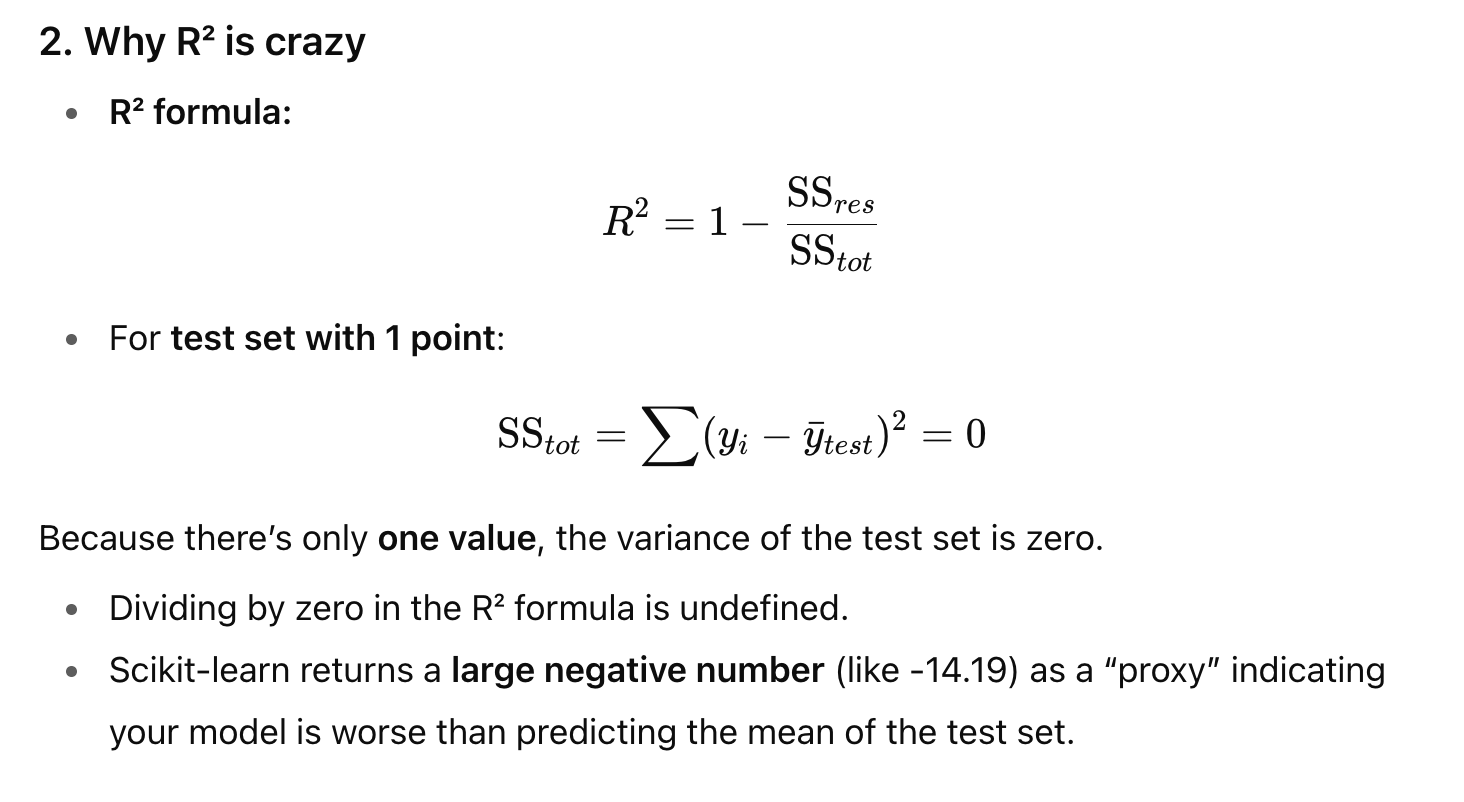

**Option A: Use cross-validation**

This way you use all data points in a rotating train/test split → no single-point test problem.

In [15]:
## Option A: Use cross-validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X = df[['Muffins']]
y = df['Time Taken']

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 5-fold CV
print("R² scores for each fold:", scores)
print("Mean R²:", scores.mean())
print("Standard Deviation of R²:", scores.std())


R² scores for each fold: [-0.33255696  0.48979982  0.76049124  0.72403883 -3.84763314]
Mean R²: -0.44117204003783844
Standard Deviation of R²: 1.7483817694382904



**Option B: Avoid R² for tiny datasets**

Use MAE, RMSE instead. They are more meaningful than R² when test set is extremely small.

## Key Takeaways
- R² can be negative (and extremely so) → happens when test set is too small or model is worse than predicting mean.
- Never trust test R² if your test set has 1 or 2 points.
- Use cross-validation for tiny datasets to get reliable performance metrics.

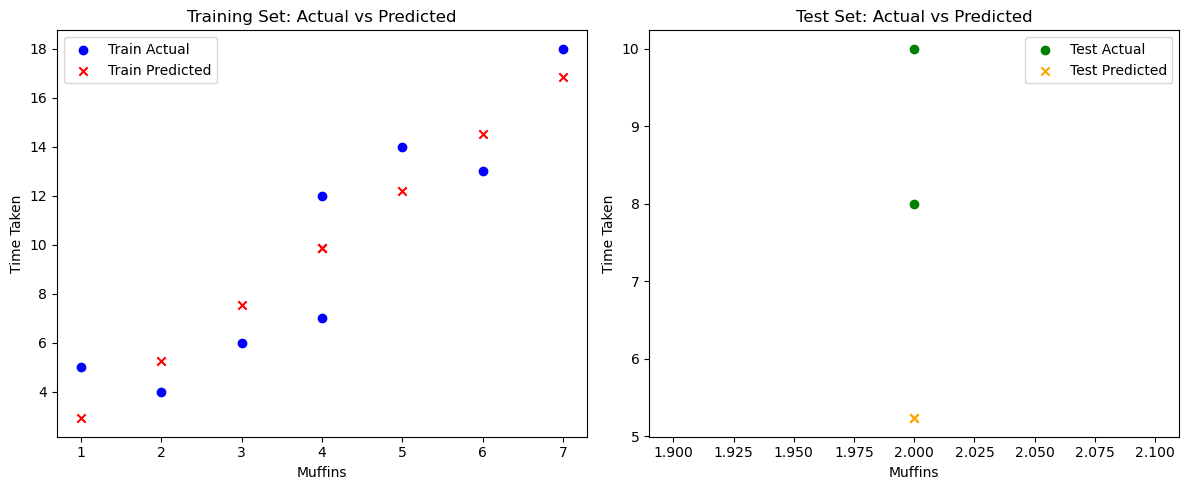

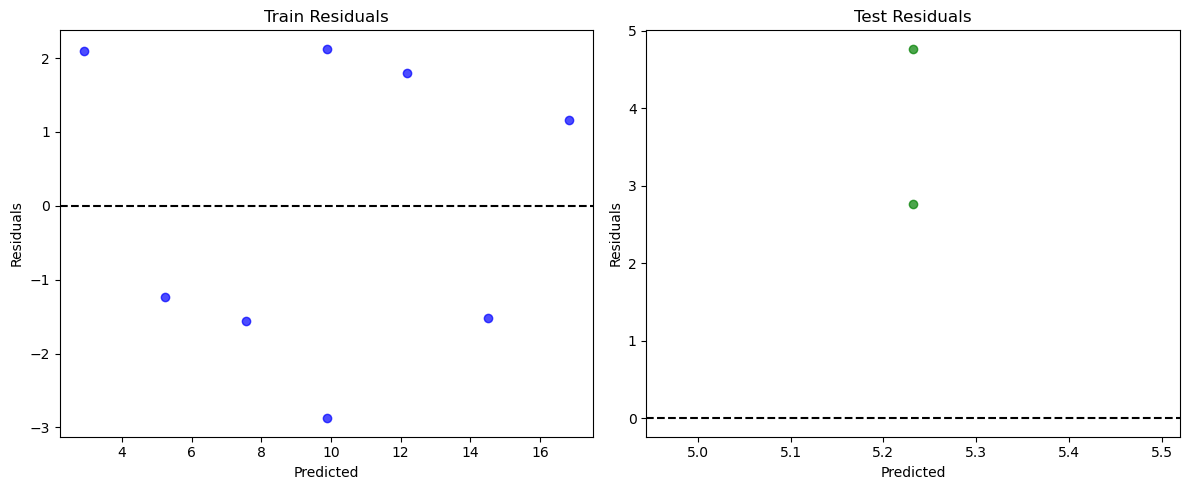

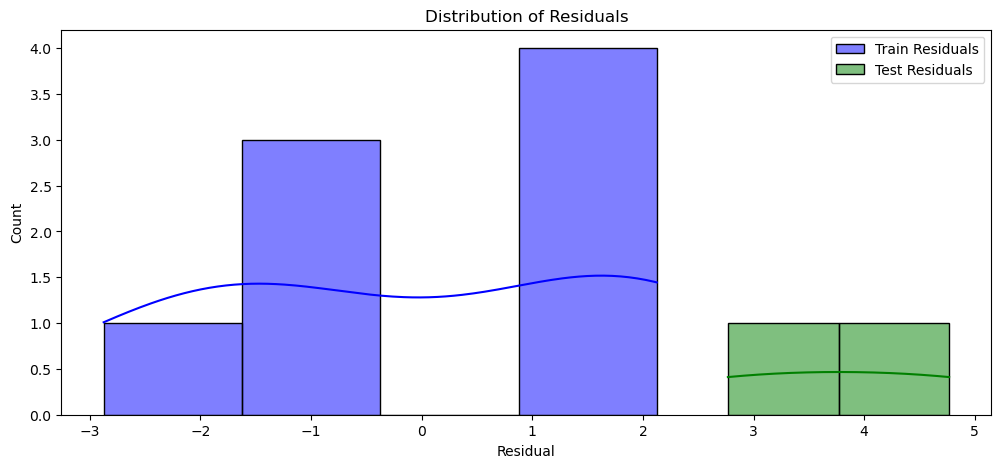

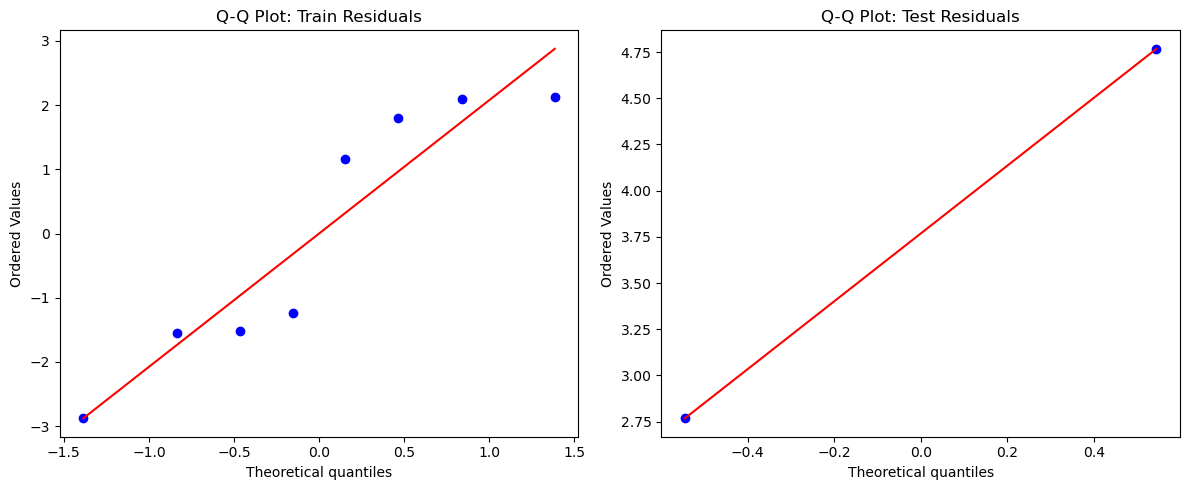

In [16]:
# Plot the results - Scatter plot of X_train, y_train, y_train_pred
# Plot the results - Scatter plot of X_test, y_test, y_test_pred
# Show residuals plot for train and test
# Plot the distribution of residuals for train and test
# Plot the Q-Q plot for train and test residuals

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 1. Scatter plot: Training and Test data with predictions
plt.figure(figsize=(12, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Train Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Train Predicted', marker='x')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Muffins')
plt.ylabel('Time Taken')
plt.legend()

# Test set
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Test Actual')
plt.scatter(X_test, y_test_pred, color='orange', label='Test Predicted', marker='x')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Muffins')
plt.ylabel('Time Taken')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Residuals plot
train_residuals = np.ravel(y_train) - np.ravel(y_train_pred)
test_residuals = np.ravel(y_test) - np.ravel(y_test_pred)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(np.ravel(y_train_pred), train_residuals, color='blue', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.title('Train Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(np.ravel(y_test_pred), test_residuals, color='green', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.title('Test Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# 3. Distribution of residuals
plt.figure(figsize=(12, 5))
sns.histplot(train_residuals, kde=True, color='blue', label='Train Residuals')
sns.histplot(test_residuals, kde=True, color='green', label='Test Residuals')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.legend()
plt.show()

# 4. Q-Q plots for residuals
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
stats.probplot(train_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot: Train Residuals')

plt.subplot(1, 2, 2)
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot: Test Residuals')

plt.tight_layout()
plt.show()


## Multivariate Linear Regression

In [27]:
df_mvr = pd.read_csv(raw_data + 'bakery_muffins_with_staff.csv')
df_mvr.head()

,Muffins,Time Taken,Staff
0,1,5,1
1,2,8,1
2,4,12,2
3,3,6,1
4,2,4,1


In [28]:
# Separate features and target variable
X_mvr = df_mvr[['Muffins', 'Staff']]
y_mvr = df_mvr['Time Taken']

# Split the data into training and testing sets (80:20)
X_train_mvr, X_test_mvr, y_train_mvr, y_test_mvr = train_test_split(X_mvr, y_mvr, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
model_mvr = LinearRegression()
model_mvr.fit(X_train_mvr, y_train_mvr)

# Make predictions on training and testing sets
y_train_pred_mvr = model_mvr.predict(X_train_mvr)
y_test_pred_mvr = model_mvr.predict(X_test_mvr)

# Print model details and parameters
print("Model Rank", model_mvr.rank_)
print("Model Singular Values", model_mvr.singular_)
print("Model Coefficients", model_mvr.coef_)
print("Model Intercept", model_mvr.intercept_)
print("Equation: Time_Taken =", model_mvr.intercept_, "+", model_mvr.coef_[0], "* Muffins +", model_mvr.coef_[1], "* Staff")

print("Model Number of Features", model_mvr.n_features_in_)
print("Model Feature Names", model_mvr.feature_names_in_)
print("Model R²", model_mvr.score(X_mvr, y_mvr))

Model Rank 2
Model Singular Values [5.56333894 0.7411207 ]
Model Coefficients [1.33823529 3.05882353]
Model Intercept -0.8308823529411757
Equation: Time_Taken = -0.8308823529411757 + 1.338235294117646 * Muffins + 3.0588235294117663 * Staff
Model Number of Features 2
Model Feature Names ['Muffins' 'Staff']
Model R² 0.6823220396793275


In [30]:
# Calculate evaluation metrics for multiple linear regression
mse_mvr_train, var_mvr_train, rmse_mvr_train, std_var_mvr_train, mae_mvr_train, mean_val_mvr_train, mape_mvr_train, r2_mvr_train = calculate_metrics(y_train_mvr, y_train_pred_mvr)
mse_mvr_test, var_mvr_test, rmse_mvr_test, std_var_mvr_test, mae_mvr_test, mean_val_mvr_test, mape_mvr_test, r2_mvr_test = calculate_metrics(y_test_mvr, y_test_pred_mvr)

# Convert results from train and test predictions to a dataframe
results_mvr = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'MSE': [mse_mvr_train, mse_mvr_test],
    'Variance': [var_mvr_train, var_mvr_test],
    'RMSE': [rmse_mvr_train, rmse_mvr_test],
    'Std_Dev': [std_var_mvr_train, std_var_mvr_test],
    'MAE': [mae_mvr_train, mae_mvr_test],
    'Mean': [mean_val_mvr_train, mean_val_mvr_test],
    'MAPE': [mape_mvr_train, mape_mvr_test],
    'R²': [r2_mvr_train, r2_mvr_test]
})

# Print the results
results


,Dataset,MSE,Variance,RMSE,Std_Dev,MAE,Mean,MAPE,R²
0,Training,3.497768,25.553571,1.870232,5.055054,1.794643,9.875,0.235336,0.843566
1,Testing,15.196747,2.000000,3.898301,1.414214,3.767857,9.000,0.411384,-14.196747


| **Assumption**           | **Plot / Visualization**                                           | **What to Look For / Interpretation**                                                                                                                        |
| ------------------------ | ------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Linearity**            | Residuals vs Predicted Values or Residuals vs Each Predictor       | Residuals should scatter randomly around 0. Any systematic curve or trend indicates violation.                                                               |
| **Independence**         | Residuals vs Observation Index (sequence plot)                     | Residuals should not show patterns or trends over time/order. Trends or repeated patterns indicate dependence.                                               |
| **Homoscedasticity**     | Residuals vs Predicted Values                                      | Residuals should have roughly constant spread across all predicted values. Funnel or cone shapes indicate heteroscedasticity (variance changes).             |
| **Normality of Errors**  | Histogram of residuals, Q-Q plot                                   | Histogram roughly bell-shaped. Q-Q plot points lie approximately along the 45° diagonal. Skewed, heavy-tailed, or outlier-prone residuals violate normality. |
| **No Multicollinearity** | Correlation heatmap of predictors, Variance Inflation Factor (VIF) | Correlation coefficients near ±1 indicate high multicollinearity. VIF > 5–10 is a strong warning of correlated predictors.                                   |


----------------------------------------------------------------------------------------------------
Multiple Linear Regression: Actual vs Predicted - Check Output Closeness
----------------------------------------------------------------------------------------------------


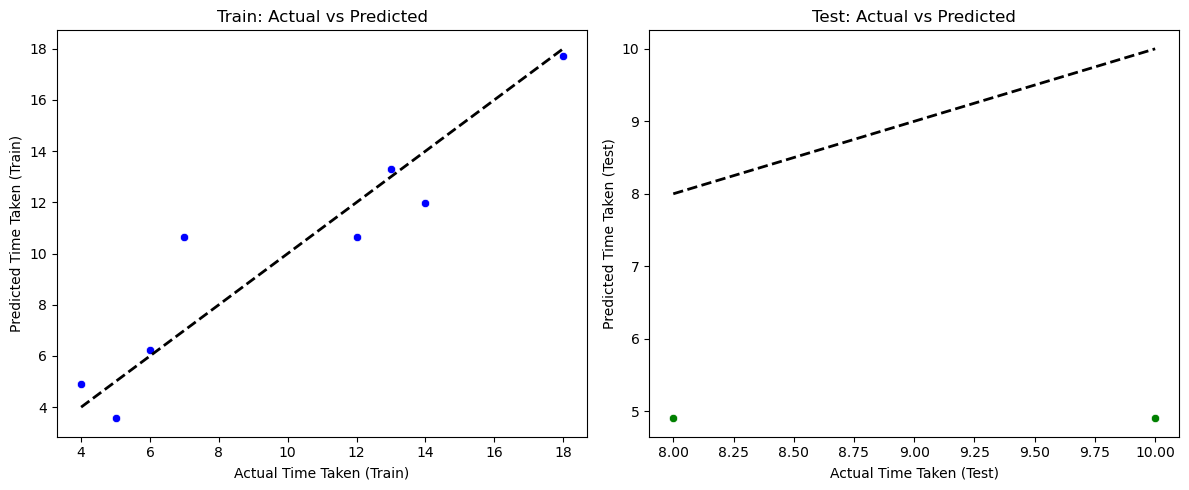



----------------------------------------------------------------------------------------------------
2. Multiple Linear Regression: Residuals vs Observation Index (Independence Check)
----------------------------------------------------------------------------------------------------
- Independence: Residuals should not show patterns or trends over time/order. Trends or repeated patterns indicate dependence.


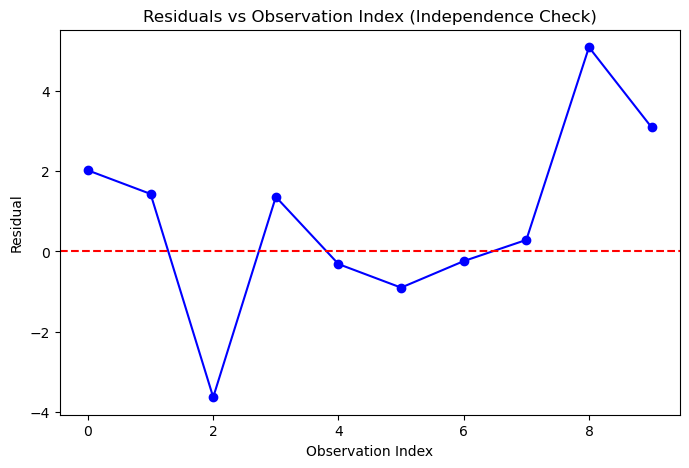

----------------------------------------------------------------------------------------------------
1 & 3. Multiple Linear Regression: Residuals vs Predicted (linearity + homoscedasticity check)
----------------------------------------------------------------------------------------------------
- Linearity: Residuals should scatter randomly around 0. Any systematic curve or trend indicates violation.
- Homoscedasticity: Residuals should have roughly constant spread across all predicted values. Funnel or cone shapes indicate heteroscedasticity


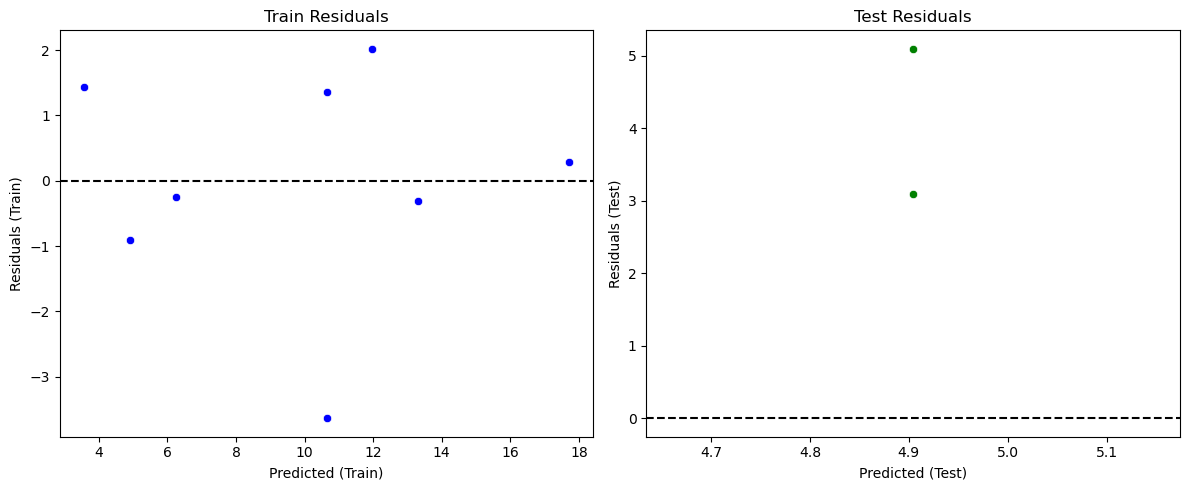

Mean and variance of residuals (should be ~0 and constant for homoscedasticity)
----------------------------------------------------------------------------------------------------
Train residuals mean: 7.771561172376096e-16
Train residuals variance: 3.1859243697478985
Test residuals mean: 4.095588235294118
Test residuals variance: 2.0


----------------------------------------------------------------------------------------------------
4. Multiple Linear Regression: Distribution of Residuals Histogram - normality check
----------------------------------------------------------------------------------------------------
- Normality: Histogram roughly bell-shaped. Skewed, heavy-tailed, or outlier-prone residuals violate normality.


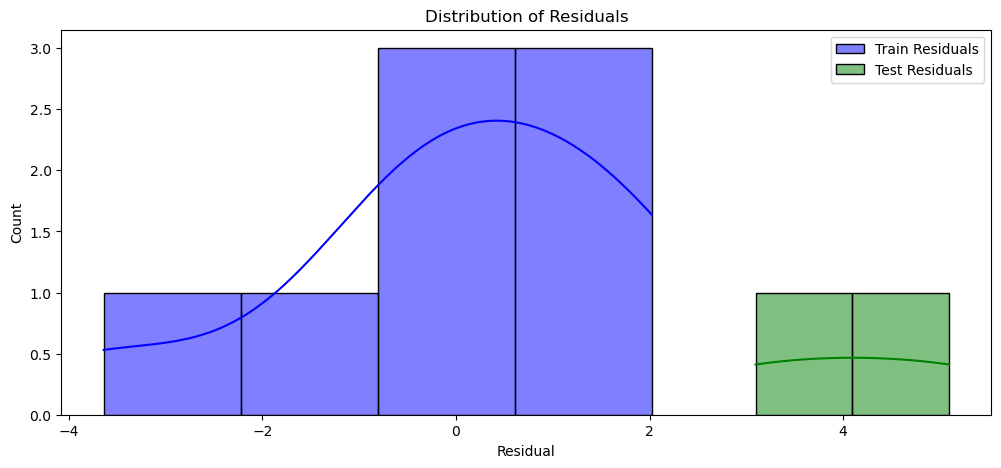

Skewness and Kurtosis of Residuals for normality check
----------------------------------------------------------------------------------------------------
Train residuals skewness: -0.9465871435958787
Train residuals kurtosis: 0.22590274764912843
Test residuals skewness: 0.0
Test residuals kurtosis: -2.0


----------------------------------------------------------------------------------------------------
4. Quantile-Quantile (Q-Q) plots for residuals
----------------------------------------------------------------------------------------------------
- Normality: Q-Q plot points lie approximately along the 45° diagonal. Skewed, heavy-tailed, or outlier-prone residuals violate normality.


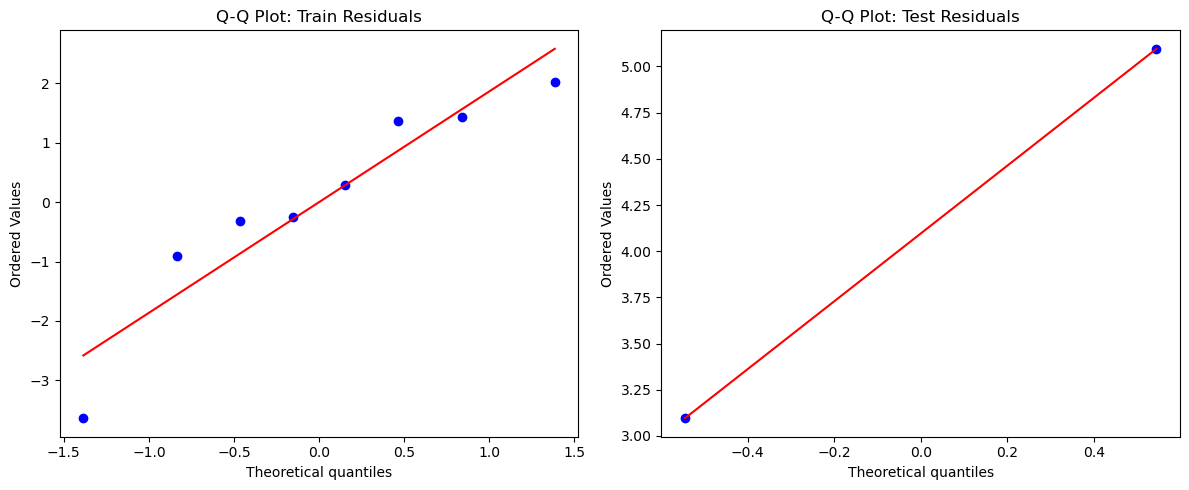



----------------------------------------------------------------------------------------------------
5. Multiple Linear Regression: Correlation heatmap of features (multicollinearity check)
----------------------------------------------------------------------------------------------------
- No Multicollinearity: Correlation coefficients near ±1 indicate high multicollinearity.


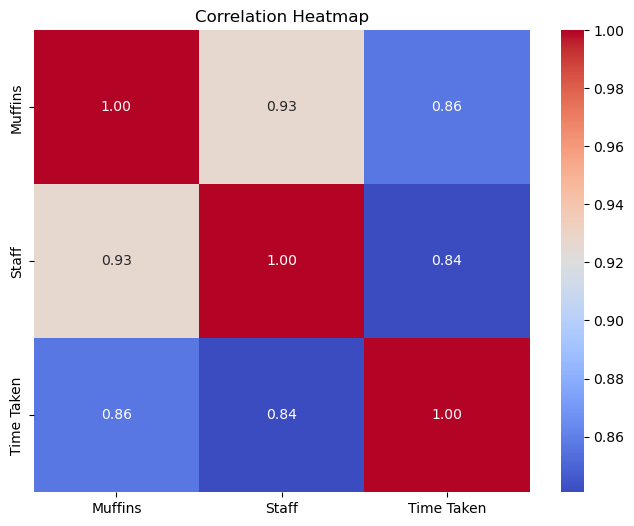

----------------------------------------------------------------------------------------------------
5. Variance Inflation Factor (VIF) for each feature - multicollinearity check
----------------------------------------------------------------------------------------------------
- No Multicollinearity: VIF > 5–10 is a strong warning of correlated predictors.
   feature       VIF
0    const  7.429907
1  Muffins  7.072897
2    Staff  7.072897


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

# 1. Actual vs Predicted for Training and Test sets
print("-" * 100)
print("Multiple Linear Regression: Actual vs Predicted - Check Output Closeness")
print("-" * 100)
plt.figure(figsize=(12, 5))

# Training set
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_mvr, y=y_train_pred_mvr, color='blue')
plt.plot([y_train_mvr.min(), y_train_mvr.max()], [y_train_mvr.min(), y_train_mvr.max()], 'k--', lw=2)
plt.xlabel('Actual Time Taken (Train)')
plt.ylabel('Predicted Time Taken (Train)')
plt.title('Train: Actual vs Predicted')

# Test set
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_mvr, y=y_test_pred_mvr, color='green')
plt.plot([y_test_mvr.min(), y_test_mvr.max()], [y_test_mvr.min(), y_test_mvr.max()], 'k--', lw=2)
plt.xlabel('Actual Time Taken (Test)')
plt.ylabel('Predicted Time Taken (Test)')
plt.title('Test: Actual vs Predicted')

plt.tight_layout()
plt.show()

# 2. Residuals vs Observation Index (Independence Check)
print("\n")
print("-" * 100)
print("2. Multiple Linear Regression: Residuals vs Observation Index (Independence Check)")
print("-" * 100)
print("- Independence: Residuals should not show patterns or trends over time/order. Trends, repeated patterns, cycles or clustering indicate dependence.")
residuals = pd.Series(np.concatenate([y_train_mvr - y_train_pred_mvr, y_test_mvr - y_test_pred_mvr]), name='Residuals')
plt.figure(figsize=(8,5))
plt.plot(residuals.values, marker='o', linestyle='-', color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Observation Index (Row number)')
plt.ylabel('Residual')
plt.title('Residuals vs Observation Index (Independence Check)')
plt.show()

# 1 & 3. Residuals vs Predicted (linearity + homoscedasticity check)
print("-" * 100)
print("1 & 3. Multiple Linear Regression: Residuals vs Predicted (linearity + homoscedasticity check)")
print("-" * 100)
print("- Linearity: Residuals should scatter randomly around 0. Any systematic curve or trend indicates violation.")
print("- Homoscedasticity: Residuals should have roughly constant spread across all predicted values. Funnel or cone shapes indicate heteroscedasticity")
train_residuals_mvr = y_train_mvr - y_train_pred_mvr
test_residuals_mvr = y_test_mvr - y_test_pred_mvr

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred_mvr, y=train_residuals_mvr, color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted (Train)')
plt.ylabel('Residuals (Train)')
plt.title('Train Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred_mvr, y=test_residuals_mvr, color='green')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted (Test)')
plt.ylabel('Residuals (Test)')
plt.title('Test Residuals')

plt.tight_layout()
plt.show()

# Print mean and variance of residuals (should be ~0 and constant for homoscedasticity)
print("Mean and variance of residuals (should be ~0 and constant for homoscedasticity)")
print("-" * 100)
print("Train residuals mean:", np.mean(train_residuals_mvr))
print("Train residuals variance:", np.var(train_residuals_mvr, ddof=1))
print("Test residuals mean:", np.mean(test_residuals_mvr))
print("Test residuals variance:", np.var(test_residuals_mvr, ddof=1))

# 4. Distribution of residuals histogram - normality check
print("\n")
print("-" * 100)
print("4. Multiple Linear Regression: Distribution of Residuals Histogram - normality check")
print("-" * 100)
print("- Normality: Histogram roughly bell-shaped. Skewed, heavy-tailed, or outlier-prone residuals violate normality.")
plt.figure(figsize=(12, 5))
sns.histplot(train_residuals_mvr, kde=True, color='blue', label='Train Residuals')
sns.histplot(test_residuals_mvr, kde=True, color='green', label='Test Residuals')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.legend()
plt.show()

# Print skewness and kurtosis for normality
print("Skewness and Kurtosis of Residuals for normality check")
print("-" * 100)
print("Train residuals skewness:", stats.skew(train_residuals_mvr))
print("Train residuals kurtosis:", stats.kurtosis(train_residuals_mvr))
print("Test residuals skewness:", stats.skew(test_residuals_mvr))
print("Test residuals kurtosis:", stats.kurtosis(test_residuals_mvr))

# 4. Q-Q plots for residuals
print("\n")
print("-" * 100)
print("4. Quantile-Quantile (Q-Q) plots for residuals")
print("-" * 100)
print("- Normality: Q-Q plot points lie approximately along the 45° diagonal. Skewed, heavy-tailed, or outlier-prone residuals violate normality.")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
stats.probplot(train_residuals_mvr, dist="norm", plot=plt)
plt.title('Q-Q Plot: Train Residuals')

plt.subplot(1, 2, 2)
stats.probplot(test_residuals_mvr, dist="norm", plot=plt)
plt.title('Q-Q Plot: Test Residuals')

plt.tight_layout()
plt.show()

# 5. Correlation heatmap of features (multicollinearity check)
print("\n")
print("-" * 100)
print("5. Multiple Linear Regression: Correlation heatmap of features (multicollinearity check)")
print("-" * 100)
print("- No Multicollinearity: Correlation coefficients near ±1 indicate high multicollinearity.")
plt.figure(figsize=(8, 6))
corr = df_mvr[['Muffins', 'Staff', 'Time Taken']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Print VIF for each feature (multicollinearity)
print("-" * 100)
print("5. Variance Inflation Factor (VIF) for each feature - multicollinearity check")
print("-" * 100)
print("- No Multicollinearity: VIF > 5–10 is a strong warning of correlated predictors.")
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df_mvr[['Muffins', 'Staff']]
X_vif = sm.add_constant(X_vif)
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

------------
# How to do preprocessing in a pipeline


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import  SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error


In [4]:
# Example dataset
df_muff = pd.DataFrame({
    "Muffins": [1, 2, 4, 3, 2],
    "Staff": ["A", "A", "B", "A", "C"],
    "Time Taken": [5, 8, 12, 6, 4]
})
df_muff

,Muffins,Staff,Time Taken
0,1,A,5
1,2,A,8
2,4,B,12
3,3,A,6
4,2,C,4


**OneHotEncoder**
By default, scikit-learn’s OneHotEncoder does NOT drop any column — it creates one column per category.
That means if you have 3 categories, you’ll get 3 encoded columns (e.g., Staff_A, Staff_B, Staff_C).

But in linear models (like regression), one column is redundant because it can be perfectly inferred from the others. This is where drop parameter comes in.

Example

If Staff = ["A", "B", "C"], then:
- Without drop → 3 columns: Staff_A, Staff_B, Staff_C
- With drop="first" → 2 columns: Staff_B, Staff_C (because if both are 0, you know it’s Staff_A).

**Best Practice**
- For linear regression / logistic regression → use drop="first" to avoid redundancy.
- For tree-based models (RandomForest, XGBoost, etc.) → you can keep all columns (they’re not affected by multicollinearity).

In [9]:
# Features and target
X = df_muff[['Muffins', 'Staff']]
y = df_muff['Time Taken']

# Column types
num_features = ['Muffins']
cat_features = ['Staff']

# Preprocessing for numerical data
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Initialize model with pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train/ Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, transform the test data
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Predictions on train set:\n")
print (y_train_pred)

print("Predictions on test set:\n")
print (y_test_pred)


Predictions on train set:

[ 4. 12.  5.  6.]
Predictions on test set:

[5.5]
